# ACF PACF

Analyze data shampoo sales.csv
- Indentified data pattern
- Build ACF PACF plot until second differencing
- Indentified the most suitable model based on ACF PACF plot
- Build the model
- Forecast for 6 periods ahead

## Library

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## Data

In [124]:
df = pd.read_csv(r'C:\Users\dheof\Desktop\shampo sales.csv')
df.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [125]:
df.tail()

,Month,Sales
31,3-08,407.6
32,3-09,682.0
33,3-10,475.3
34,3-11,581.3
35,3-12,646.9


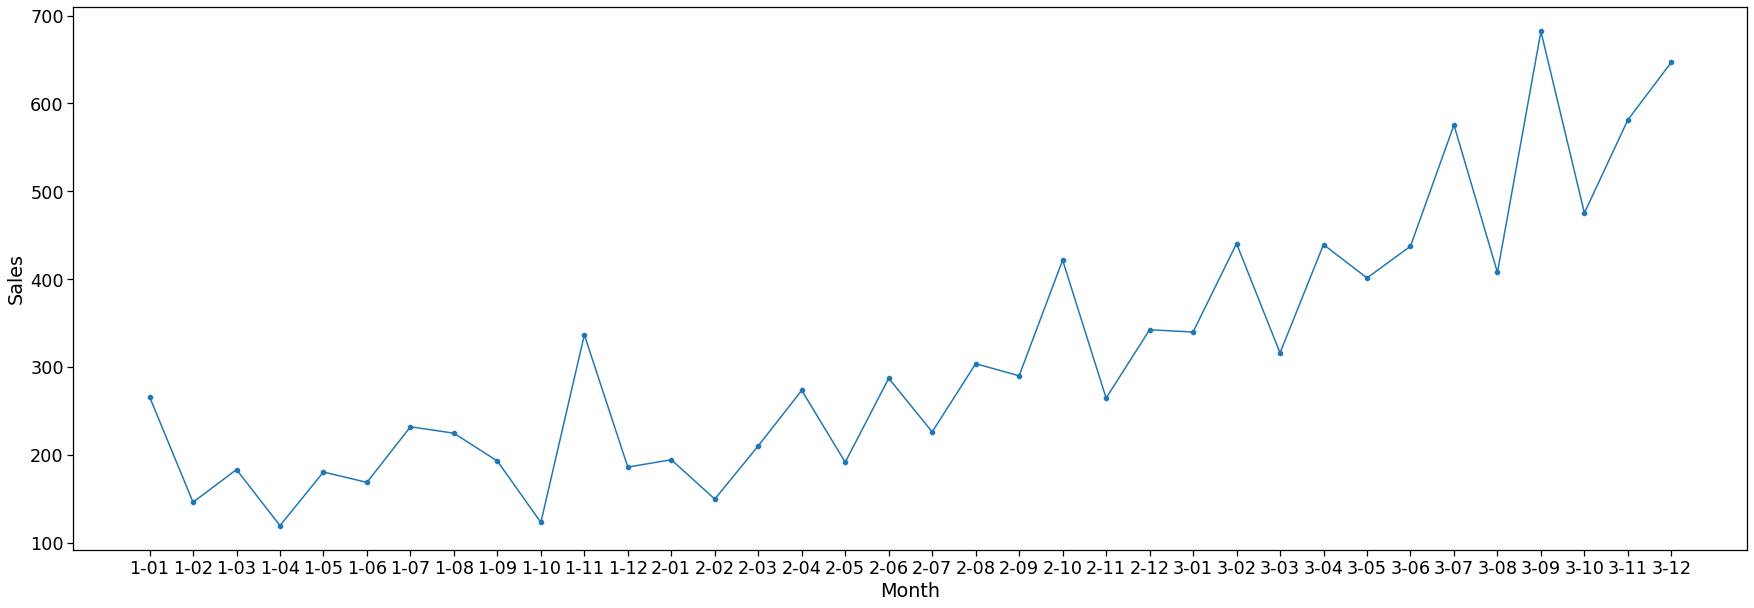

In [126]:
plt.figure(figsize = (30,10))

sns.set_context(context = 'notebook', font_scale=1.6)

sns.scatterplot(x = 'Month' , y = 'Sales', data = df)
sns.lineplot(x = 'Month', y = 'Sales', data = df)

plt.show()

## ACF & PACF

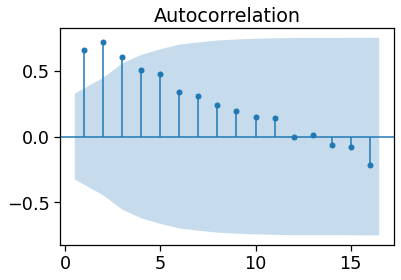

In [127]:
plot_acf(df['Sales'],zero=False)

plt.show()

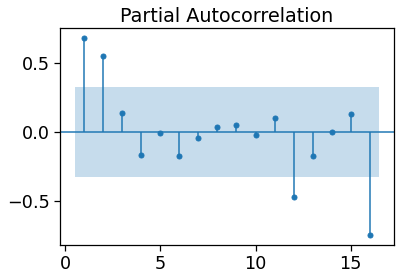

In [128]:
plot_pacf(df['Sales'],zero=False)

plt.show()

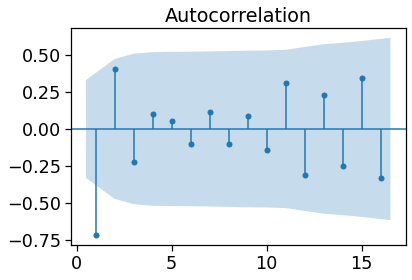

In [129]:
plot_acf(df['Sales'].diff().dropna(),zero=False)

plt.show()

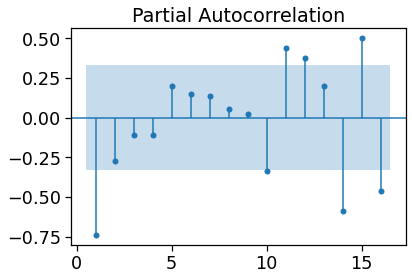

In [130]:
plot_pacf(df['Sales'].diff().dropna(),zero=False)

plt.show()

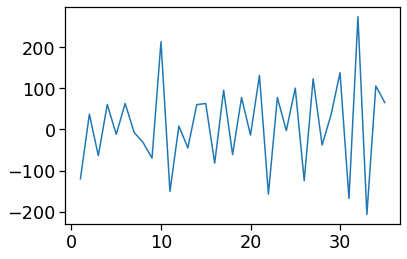

In [131]:
plt.plot(df['Sales'].diff())

KARENA CUT OFF DI LAG PERTAMA MAKA
1. ARIMA(1,1,0)
2. ARIMA(0,1,1)

## Model: ARIMA(1,1,0)

In [132]:
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA', FutureWarning)

model = ARIMA(df['Sales'], order = (1,1,0))
model_fit = model.fit()

C:\Users\dheof\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)




In [133]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -200.011
Method:                       css-mle   S.D. of innovations             72.566
Date:                Sun, 17 Oct 2021   AIC                            406.022
Time:                        21:48:42   BIC                            410.688
Sample:                             1   HQIC                           407.633
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            11.8300      7.152      1.654      0.098      -2.187      25.847
ar.L1.D.Sales    -0.7364      0.111     -6.605      0.000      -0.955      -0.518
                                    Root

PILIH MODEL 1,1,0 KARENA NILAI AIC LEBIH KECIL

## Forecast Result

In [134]:
forecast_result = model_fit.forecast(6)
forecast_result[0]

array([619.13185929, 660.12319512, 650.47771224, 678.12290605,
       678.30597639, 698.71308911])

In [135]:
forecast_result[1]

array([ 72.56622786,  75.04439246,  95.1404831 ,  99.60865313,
       111.83395207, 117.22004663])

In [136]:
forecast_result[2]

array([[476.90466619, 761.35905239],
       [513.03888866, 807.20750158],
       [464.00579189, 836.94963259],
       [482.89353337, 873.35227874],
       [459.11545808, 897.49649469],
       [468.96601944, 928.46015877]])

## Visualisasi Forecast

In [137]:
month = []
forecast_length = 6

for i in range(1, forecast_length + 1):
    month.append('4-'+str(i))

In [138]:
df_sales_forecast = pd.DataFrame({
    'Month' : month,
    'Sales' : forecast_result[0]
})

In [139]:
df_sales_forecast['Se'] = forecast_result[1]
df_sales_forecast['Lower Bound'] = forecast_result[2][:,0]
df_sales_forecast['Upper Bound'] = forecast_result[2][:,1]
df_sales_forecast

,Month,Sales,Se,Lower Bound,Upper Bound
0,4-1,619.131859,72.566228,476.904666,761.359052
1,4-2,660.123195,75.044392,513.038889,807.207502
2,4-3,650.477712,95.140483,464.005792,836.949633
3,4-4,678.122906,99.608653,482.893533,873.352279
4,4-5,678.305976,111.833952,459.115458,897.496495
5,4-6,698.713089,117.220047,468.966019,928.460159


In [140]:
df_sales_forecast.iloc[:1,:][['Month', 'Sales']]

,Month,Sales
0,4-1,619.131859


In [141]:
df = df.append(df_sales_forecast.iloc[:1,:][['Month', 'Sales']])

In [142]:
fig = go.Figure([go.Scatter(name = 'Real', x = df['Month'], y= df['Sales'])])
fig.add_trace(go.Scatter(name = 'Forecast', x = df_sales_forecast['Month'], y= df_sales_forecast['Sales']))
fig.add_trace(go.Scatter(name = 'Lower Bound', x = df_sales_forecast['Month'], y= df_sales_forecast['Lower Bound']))
fig.add_trace(go.Scatter(name = 'Upper Bound', x = df_sales_forecast['Month'], y= df_sales_forecast['Upper Bound']))

fig.update_xaxes(rangeslider_visible = True)
fig.show()

# Time Series with Feature Engineering

Analyze data opsd_germany_daily.csv
- Build a time series model using lineear regression
    - Target: Consumption
    - Feature: Date
    - FE Date 1: year, month, day, weekday
    - FE Date 2: year, month, day, weekday, year 2009, year > 2014, christmas, winter
- Split Data
    - Training: 2006 - 2015
    - Test: 2016 - end
- Compare the result (FE 1, FE 2) using following evaluation metrics:
    - Explained variance
    - Mean square log error
    - R2
    - MAE
    - MSE
    - RMSE
- Plot test data, FE Date 1 forecasting result, FE Date 2 forecasting result

# Feature Engineering 1

## Library

In [143]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression

In [144]:
url='https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'
df = pd.read_csv(url,sep=",")
df

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.18400,NaN,NaN,NaN
1,2006-01-02,1380.52100,NaN,NaN,NaN
2,2006-01-03,1442.53300,NaN,NaN,NaN
3,2006-01-04,1457.21700,NaN,NaN,NaN
4,2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714


In [145]:
df[['Date', 'Consumption']].isnull().sum()

Date           0
Consumption    0
dtype: int64

## Feature Engineering: Ekstrasi Tanggal

In [146]:
df['Date'] = pd.to_datetime(df['Date'])

In [147]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day 
df['Weekday'] = df['Date'].dt.weekday

In [148]:
df

,Date,Consumption,Wind,Solar,Wind+Solar,Year,Month,Day,Weekday
0,2006-01-01,1069.18400,NaN,NaN,NaN,2006,1,1,6
1,2006-01-02,1380.52100,NaN,NaN,NaN,2006,1,2,0
2,2006-01-03,1442.53300,NaN,NaN,NaN,2006,1,3,1
3,2006-01-04,1457.21700,NaN,NaN,NaN,2006,1,4,2
4,2006-01-05,1477.13100,NaN,NaN,NaN,2006,1,5,3
...,...,...,...,...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037,2017,12,27,2
4379,2017-12-28,1299.86398,506.424,14.162,520.586,2017,12,28,3
4380,2017-12-29,1295.08753,584.277,29.854,614.131,2017,12,29,4
4381,2017-12-30,1215.44897,721.247,7.467,728.714,2017,12,30,5


## EDA

C:\Users\dheof\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Consumption', ylabel='Density'>

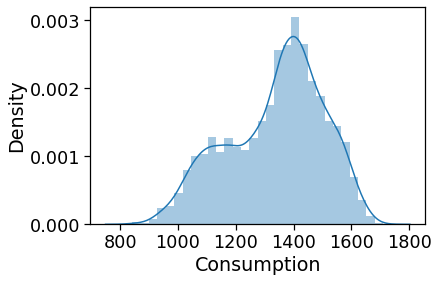

In [149]:
sns.distplot(df['Consumption'])

In [150]:
fig = go.Figure([go.Scatter(name = 'Consumption', x = df['Date'], y = df['Consumption'])])

fig.update_xaxes(rangeslider_visible = True)
fig.show()

<AxesSubplot:xlabel='Year', ylabel='Consumption'>

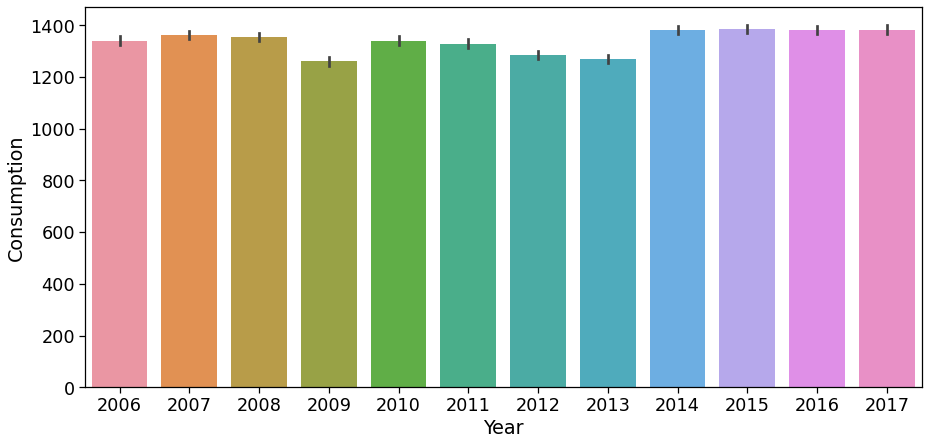

In [151]:
plt.figure(figsize=(15,7))
sns.barplot(x = 'Year', y = 'Consumption', data = df)

<AxesSubplot:xlabel='Month', ylabel='Consumption'>

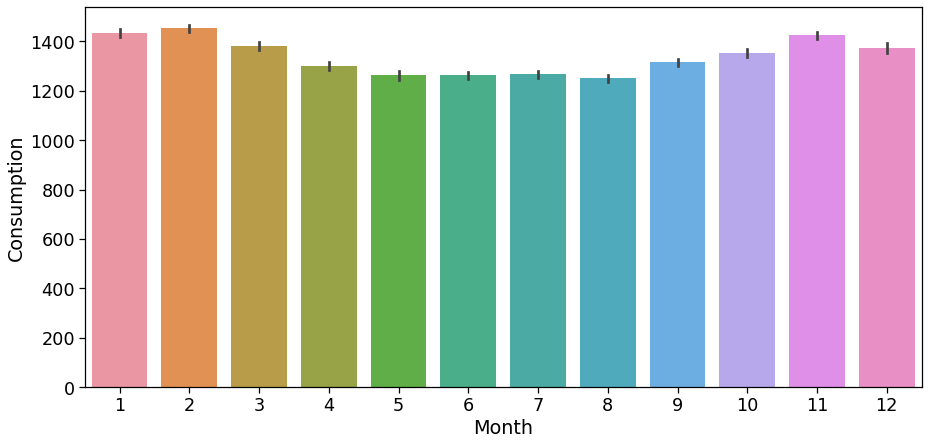

In [152]:
plt.figure(figsize=(15,7))
sns.barplot(x = 'Month', y = 'Consumption', data = df)

<AxesSubplot:xlabel='Day', ylabel='Consumption'>

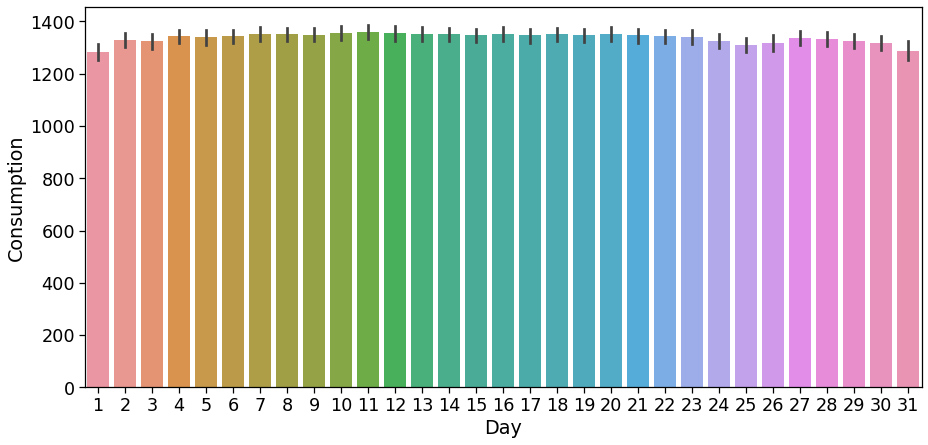

In [153]:
plt.figure(figsize=(15,7))
sns.barplot(x = 'Day', y = 'Consumption', data = df)

<AxesSubplot:xlabel='Weekday', ylabel='Consumption'>

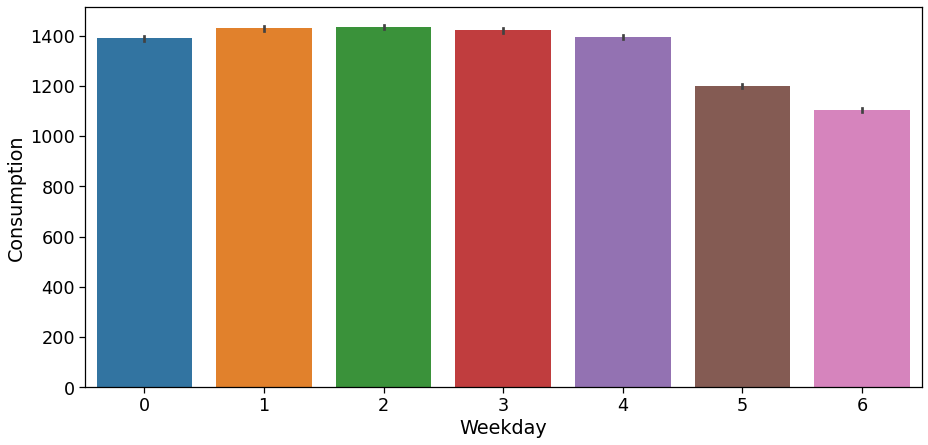

In [154]:
plt.figure(figsize=(15,7))
sns.barplot(x = 'Weekday', y = 'Consumption', data = df)

## Skenario Preprocessing

In [155]:
cat_features = ['Month', 'Day', 'Weekday']
transformer = ColumnTransformer([
    ('one hot', OneHotEncoder(drop = 'first'), cat_features)
], remainder = 'passthrough')

## Splitting

In [156]:
x = df[['Year', 'Month', 'Day', 'Weekday']]
y = df['Consumption']

In [157]:
x_train = x[x['Year']<2016]
x_test = x[x['Year']>=2016]

y_train = y[x['Year']<2016]
y_test = y[x['Year']>=2016]

## Model

In [158]:
x_train_prep = transformer.fit_transform(x_train)
x_test_prep = transformer.transform(x_test)

In [159]:
model = LinearRegression()
model.fit(x_train_prep, y_train)

LinearRegression()

In [160]:
y_pred = model.predict(x_test_prep)

In [161]:
import sklearn.metrics as metrics


In [162]:
def evaluasi(y_true, y_pred):
    mse = metrics.mean_squared_error(y_true, y_pred)
    msle = metrics.mean_squared_log_error(y_true, y_pred)
    rsq = metrics.r2_score(y_true, y_pred)

    print('MSE', mse)
    print('MSLE', msle)
    print('R2', rsq)

    plt.figure(figsize=(10,7))
    sns.scatterplot(y_pred, y_true-y_pred)

MSE 7245.002653841105
MSLE 0.0039061852289993602
R2 0.723912409739869


C:\Users\dheof\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



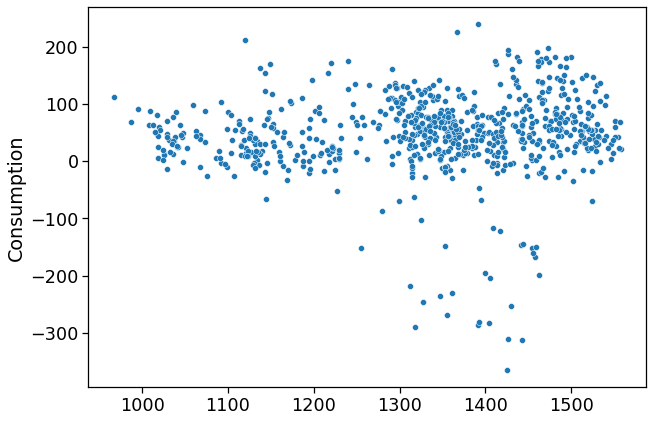

In [163]:
evaluasi(y_test, y_pred)

# FEATURE ENGINEERING 2

CONTINUE ANALYZE DATA OPSD_GERMANY_DAILY.CSV
- WITH FE DATE 2, TRY SEVERAL MODELS AND FIND THE BEST MODEL BASED ON R-SQUARE IN FORWARD CHAINING STRATEGY (5SPLITS)
- THOSE MODELS ARE: RIDGE, LASSO, ELASTIC, NET, SVR
- OPTIMIZE THE BEST MODEL BASED ON R-SQUARE USING HYPERPARAMETER TUNING
- CHECK THE FINAL PERFOMANCE: EXPLAINED VARIANCE, MEAN SQUARE LOG ERROR, R2, MAE, MSE, RMSE
- PLOT TTEST DATA, FE DATE1 FORCASTING RESULT, FE DATE 2 FORECASTING RESULT, FE DATE 2 (TUNED MODEL) FORECASTING RESULT

FE DATE 2: YEAR, MONTH, DAY, WEEKDAY, YEAR 2009, YEAR > 2014, CHRISTMAS, WINTER

In [164]:
df

,Date,Consumption,Wind,Solar,Wind+Solar,Year,Month,Day,Weekday
0,2006-01-01,1069.18400,NaN,NaN,NaN,2006,1,1,6
1,2006-01-02,1380.52100,NaN,NaN,NaN,2006,1,2,0
2,2006-01-03,1442.53300,NaN,NaN,NaN,2006,1,3,1
3,2006-01-04,1457.21700,NaN,NaN,NaN,2006,1,4,2
4,2006-01-05,1477.13100,NaN,NaN,NaN,2006,1,5,3
...,...,...,...,...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037,2017,12,27,2
4379,2017-12-28,1299.86398,506.424,14.162,520.586,2017,12,28,3
4380,2017-12-29,1295.08753,584.277,29.854,614.131,2017,12,29,4
4381,2017-12-30,1215.44897,721.247,7.467,728.714,2017,12,30,5


In [165]:
df['2009'] = np.where(df['Year'] == 2009, 1, 0)
df['>2014'] = np.where(df['Year'] >= 2014, 1, 0)

In [166]:
natal = ((df['Month'] == 12) & (df['Day'] >= 25)) | ((df['Month'] == 1) & (df['Day'].isin([1,2,3])))
df['Natal'] = np.where(natal, 1, 0)

In [167]:
winter = df['Month'].isin([12,1,2,3])
df['Winter'] = np.where(winter,1,0)

## Data splitting

In [168]:
x = df[['Year', 'Month', 'Day', 'Weekday', 'Natal', 'Winter', '2009', '>2014']]
y = df['Consumption']

In [169]:
x_train = x[x['Year']<2016]
x_test = x[x['Year']>=2016]

y_train = y[x['Year']<2016]
y_test = y[x['Year']>=2016]

## Preprocessing

In [170]:
cat_features = ['Month', 'Day', 'Weekday']
transformer = ColumnTransformer([
    ('one hot', OneHotEncoder(drop = 'first'), cat_features)
], remainder = 'passthrough')

## Eval

In [171]:
x_train_prep2 = transformer.fit_transform(x_train)
x_test_prep2 = transformer.transform(x_test)

In [172]:
model2 = LinearRegression()
model2.fit(x_train_prep2, y_train)

LinearRegression()

In [173]:
y_pred2 = model2.predict(x_test_prep2)

MSE 7245.002653841105
MSLE 0.0039061852289993602
R2 0.723912409739869


C:\Users\dheof\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



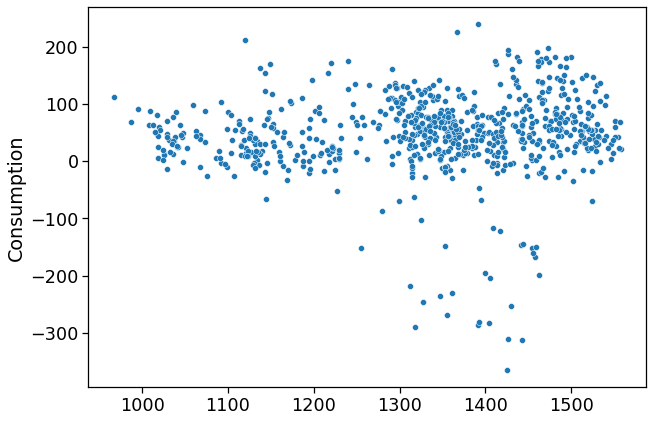

In [174]:
evaluasi(y_test, y_pred)

MSE 4328.9745006603835
MSLE 0.0024677115799649724
R2 0.8350344098837246


C:\Users\dheof\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



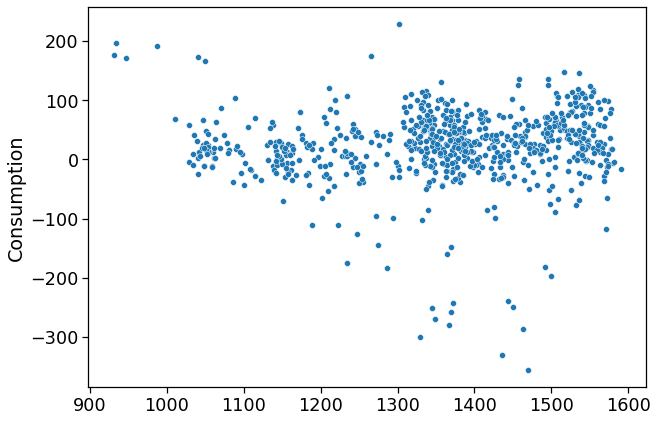

In [175]:
evaluasi(y_test, y_pred2)

## Sevral Model

RIDGE, LASSO, ELASTIC, NET, SVR

In [176]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score # 5 steps

from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [177]:
model = []
model.append(('ridge', Ridge()))
model.append(('lasso', Lasso()))
model.append(('elastic', ElasticNet()))
model.append(('regression', LinearRegression()))
model.append(('SVR', SVR()))
model.append(('knn', KNeighborsRegressor()))

result = []
names = []

for name, model, in model:
    
    tscv = TimeSeriesSplit()

    pipe_model = Pipeline([
        ('prep', transformer),
        ('model', model)
    ])
    cv_result = cross_val_score(pipe_model, x_train, y_train, cv = tscv )
    result.append(cv_result)
    names.append(name)
    print('Hasil', name)
    print('Skor', cv_result.mean())
    print('STD', cv_result.std(),'\n)')

Hasil ridge
Skor 0.7655861125257101
STD 0.06432098677951066 
)
Hasil lasso
Skor 0.7628919535529434
STD 0.05806499993290969 
)
Hasil elastic
Skor 0.22750713474346354
STD 0.08187058722159644 
)
Hasil regression
Skor 0.7650085645591936
STD 0.06366731074735672 
)
Hasil SVR
Skor -0.07340961840376088
STD 0.0620466931149162 
)
Hasil knn
Skor 0.5627644962232914
STD 0.062306789885958086 
)


In [178]:
result

[array([0.66287022, 0.82122551, 0.78091975, 0.72532946, 0.83758563]),
 array([0.68129619, 0.83583828, 0.7773366 , 0.71175927, 0.80822944]),
 array([0.25211534, 0.25681937, 0.31104863, 0.24715637, 0.07039596]),
 array([0.66270638, 0.81840328, 0.7796178 , 0.72670822, 0.83760714]),
 array([-0.00326   , -0.17866923, -0.08953464, -0.07673927, -0.01884495]),
 array([0.50101525, 0.52842233, 0.6812171 , 0.55986927, 0.54329853])]

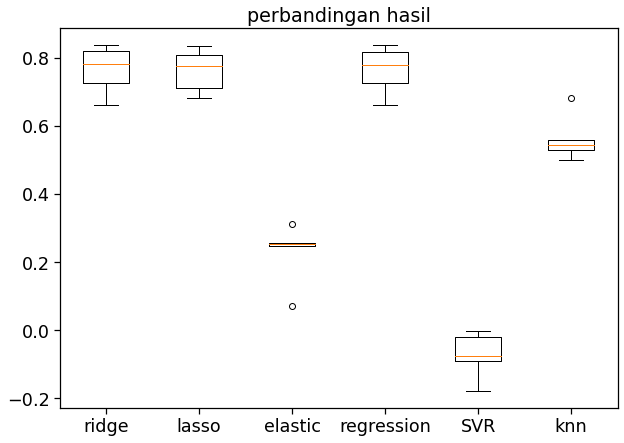

In [179]:
plt.figure(figsize=(10,7))
plt.boxplot(result, labels=names)

plt.title('perbandingan hasil')
plt.show()

## Optimalkan RIdge

In [180]:
from sklearn.model_selection import GridSearchCV

In [184]:
model = Ridge()
pipe_model = Pipeline([
    ('prep', transformer),
    ('model', model)
])

tscv = TimeSeriesSplit(n_splits=5)

pram_search = {
    'model__alpha' : [1000, 500, 100, 50, 10, 5, 1, 0.5, 0.1, 0.01, 0.001, 0.0001]
}

grid_search = GridSearchCV(
    pipe_model,
    param_grid = pram_search,
    cv = tscv,
    scoring = 'r2'
)

In [185]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('one '
                                                                         'hot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Month',
                                                                          'Day',
                                                                          'Weekday'])])),
                                       ('model', Ridge())]),
             param_grid={'model__alpha': [1000, 500, 100, 50, 10, 5, 1, 0.5,
                                          0.1, 0.01, 0.001, 0.0001]},
             scoring='r2')

In [186]:
print('Best Model', grid_search.best_params_)
print('Best Score', grid_search.best_score_)

Best Model {'model__alpha': 1}
Best Score 0.7655861125257101


In [188]:
y_pred3 = grid_search.best_estimator_.predict(x_test)

MSE 4328.9745006603835
MSLE 0.0024677115799649724
R2 0.8350344098837246


C:\Users\dheof\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



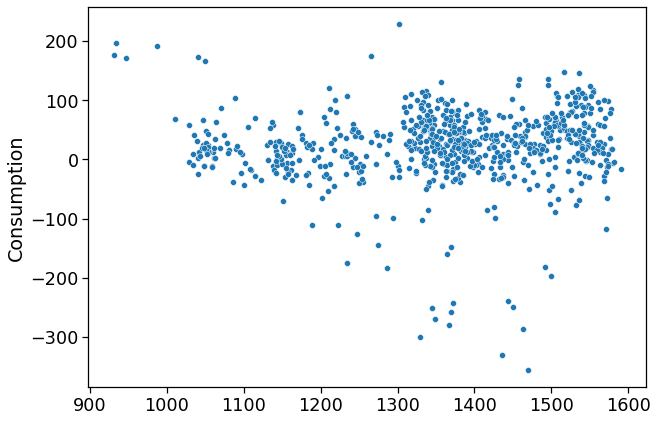

In [190]:
evaluasi(y_test, y_pred2)

MSE 4331.097939520244
MSLE 0.00246213640937317
R2 0.8349534913325668


C:\Users\dheof\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



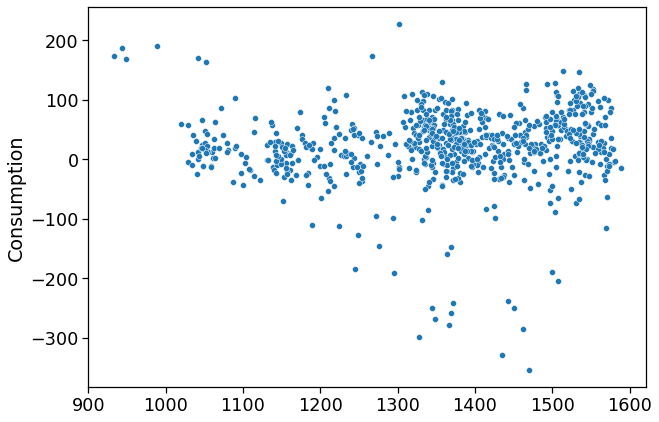

In [189]:
evaluasi(y_test, y_pred3)

## Forecasting Result

In [1]:
df[df['year'] >=2016]['Date']

NameError: name 'df' is not defined

In [196]:
df

,Date,Consumption,Wind,Solar,Wind+Solar,Year,Month,Day,Weekday,2009,>2014,Natal,Winter
0,2006-01-01,1069.18400,NaN,NaN,NaN,2006,1,1,6,0,0,1,1
1,2006-01-02,1380.52100,NaN,NaN,NaN,2006,1,2,0,0,0,1,1
2,2006-01-03,1442.53300,NaN,NaN,NaN,2006,1,3,1,0,0,1,1
3,2006-01-04,1457.21700,NaN,NaN,NaN,2006,1,4,2,0,0,0,1
4,2006-01-05,1477.13100,NaN,NaN,NaN,2006,1,5,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037,2017,12,27,2,0,1,1,1
4379,2017-12-28,1299.86398,506.424,14.162,520.586,2017,12,28,3,0,1,1,1
4380,2017-12-29,1295.08753,584.277,29.854,614.131,2017,12,29,4,0,1,1,1
4381,2017-12-30,1215.44897,721.247,7.467,728.714,2017,12,30,5,0,1,1,1


In [197]:
df_test = x_test.copy()
df_test['Date'] = df[df['year'] >=2016]['Date']
df_test['y true'] = y_test
df_test['linreg FE1'] = y_pred
df_test['linreg FE2'] = y_pred2
df_test['Ridge FE2'] = y_pred3

KeyError: 'year'

In [198]:
df_test

,Year,Month,Day,Weekday,Natal,Winter,2009,>2014
3652,2016,1,1,4,1,1,0,1
3653,2016,1,2,5,1,1,0,1
3654,2016,1,3,6,1,1,0,1
3655,2016,1,4,0,0,1,0,1
3656,2016,1,5,1,0,1,0,1
...,...,...,...,...,...,...,...,...
4378,2017,12,27,2,1,1,0,1
4379,2017,12,28,3,1,1,0,1
4380,2017,12,29,4,1,1,0,1
4381,2017,12,30,5,1,1,0,1


In [ ]:
go.Figure([go.Scatter(name = 'True', x = df_test, y = )])